In [3]:
from dataset import COCOSegmentation
import utils


In [6]:
dataset_test = COCOSegmentation(split='train', my_transforms=True)
classes = ['dent', 'scratch', 'crack', 'glass_shatter', 'lamp_broken', 'tire_flat']
sample = dataset_test[34]
print(len(dataset_test))

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
2816


In [3]:
print(type(sample[0]))
print(type(sample[1]['masks']))
print(type(sample[1]['boxes']))
print(sample[1]['labels'])


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([5])


torch.Size([3, 512, 512])


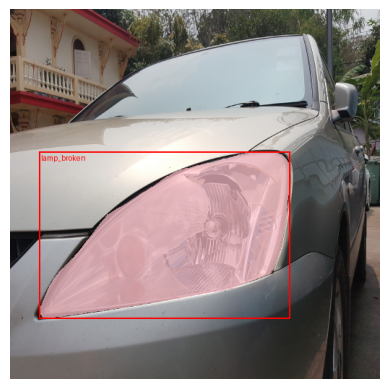

In [15]:
import torch
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
from torchvision.transforms.functional import to_tensor, to_pil_image
import matplotlib.pyplot as plt
import torchvision.transforms as T

image_tensor = (sample[0]).to(dtype=torch.uint8)
image_tensor = image_tensor.type(torch.uint8)

print(image_tensor.shape)

masks = sample[1]['masks'] > 0  # Convert masks to boolean
image_with_masks = draw_segmentation_masks(image_tensor, masks.squeeze(1), colors="pink", alpha=0.7)

boxes = sample[1]['boxes']
labels = [classes[int(label)] for label in sample[1]['labels']]
image_with_boxes = draw_bounding_boxes(image_with_masks, boxes, colors="red", labels=labels, width=2)

plt.imshow(to_pil_image(image_with_boxes))
plt.axis('off')
plt.show()

In [5]:
sample[0].shape  # Access the labels

torch.Size([3, 512, 512])